In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective
This notebook aims to check data quality of the main dataframe. At the end of it we'll create a database to be able to explore the data using SQL

In [36]:
users_subscriptions = pd.read_csv('../files/users_subscriptions.csv', encoding='utf-8', sep=';')
print(users_subscriptions.info())
users_subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_id                           125000 non-null  object 
 1   signup_at                         125000 non-null  object 
 2   country                           125000 non-null  object 
 3   platform                          125000 non-null  object 
 4   app_version                       125000 non-null  object 
 5   basics_completed                  125000 non-null  bool   
 6   basics_activity_duration_minutes  125000 non-null  float64
 7   subscription_id                   5350 non-null    object 
 8   subscription_start_at             5350 non-null    object 
 9   subscription_end_at               3728 non-null    object 
 10  subscription_type                 5350 non-null    object 
 11  subscription_price_eur            5350 non-null    f

,user_id,signup_at,country,platform,app_version,basics_completed,basics_activity_duration_minutes,subscription_id,subscription_start_at,subscription_end_at,subscription_type,subscription_price_eur
0,589cf030-2a44-4087-84ea-4346ba01c37f,2022-04-01,US,iOS,4.52.0,False,13.724117,NaN,NaN,NaN,NaN,NaN
1,3b1a94f7-c9d8-43e8-a4d3-b968dbc361d4,2021-12-19,US,iOS,4.51.0,True,30.052932,NaN,NaN,NaN,NaN,NaN
2,0ce1ce8e-d02c-4958-891e-fa1ebaa5101b,2021-12-17,FI,iOS,4.52.0,False,7.616784,NaN,NaN,NaN,NaN,NaN
3,25e5d126-2fe2-4d76-bf08-c70feca0ea18,2021-12-20,FI,Android,4.51.0,False,4.853376,NaN,NaN,NaN,NaN,NaN
4,d577175a-3187-4a94-9d17-02a17d48fa31,2022-12-01,GB,iOS,4.52.0,True,77.468088,NaN,NaN,NaN,NaN,NaN


## Check if there is duplicated rows

In [37]:
users_subscriptions.duplicated(subset=['user_id', 'subscription_id']).sum()

# we have no duplicated rows in the DF

0

## Check the app versions
If there is any version that don't follows the pattern

In [38]:
users_subscriptions.groupby(['app_version'])['user_id'].count()

# all app_version looks nice!

app_version
4.51.0    12412
4.52.0    18694
4.53.0    24997
4.54.0    31352
4.55.0    37545
Name: user_id, dtype: int64

## Check the subscriptions values
To see if there is any subscription with outlier in its value

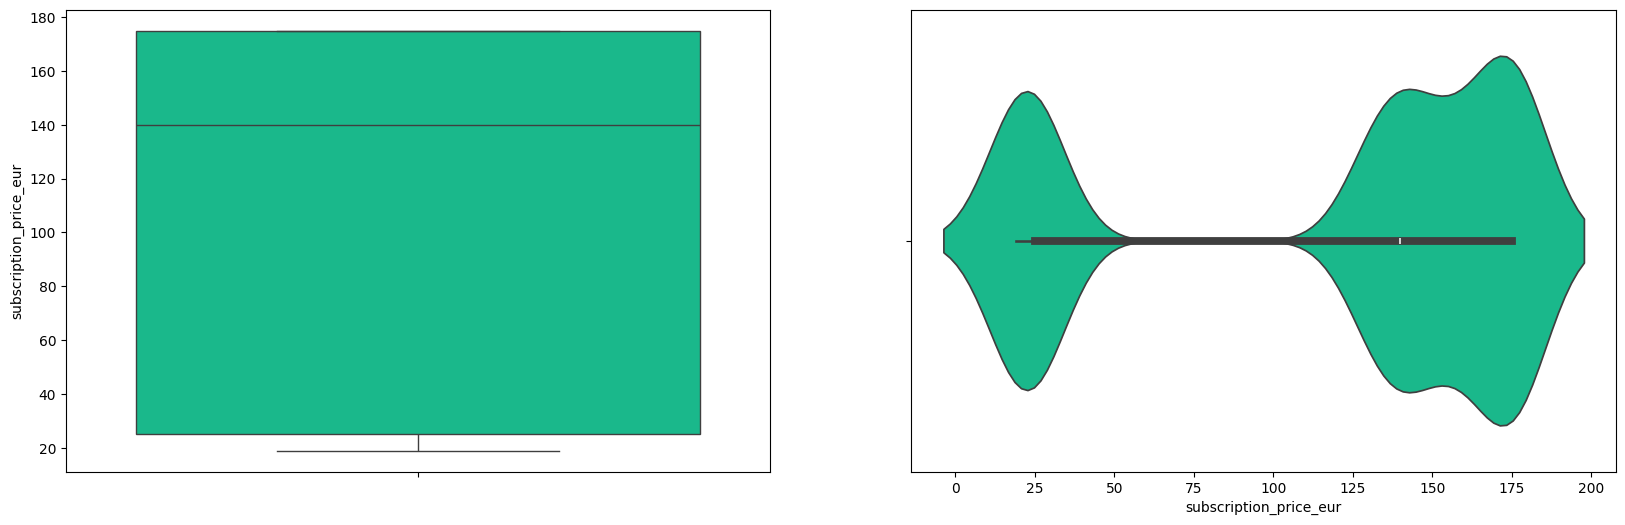

In [54]:
# filter only rows with subscription_price_eur value
df = users_subscriptions[~users_subscriptions['subscription_price_eur'].isna()]


# ploting...
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.boxplot(y = df['subscription_price_eur'], color='#00D296')

plt.subplot(1, 2, 2)
sns.violinplot(x = df['subscription_price_eur'], color='#00D296')


plt.show()

# there is no outlier in price values

## Check the basic duration time values
To see if there is any value on basic duration time that is an outlier

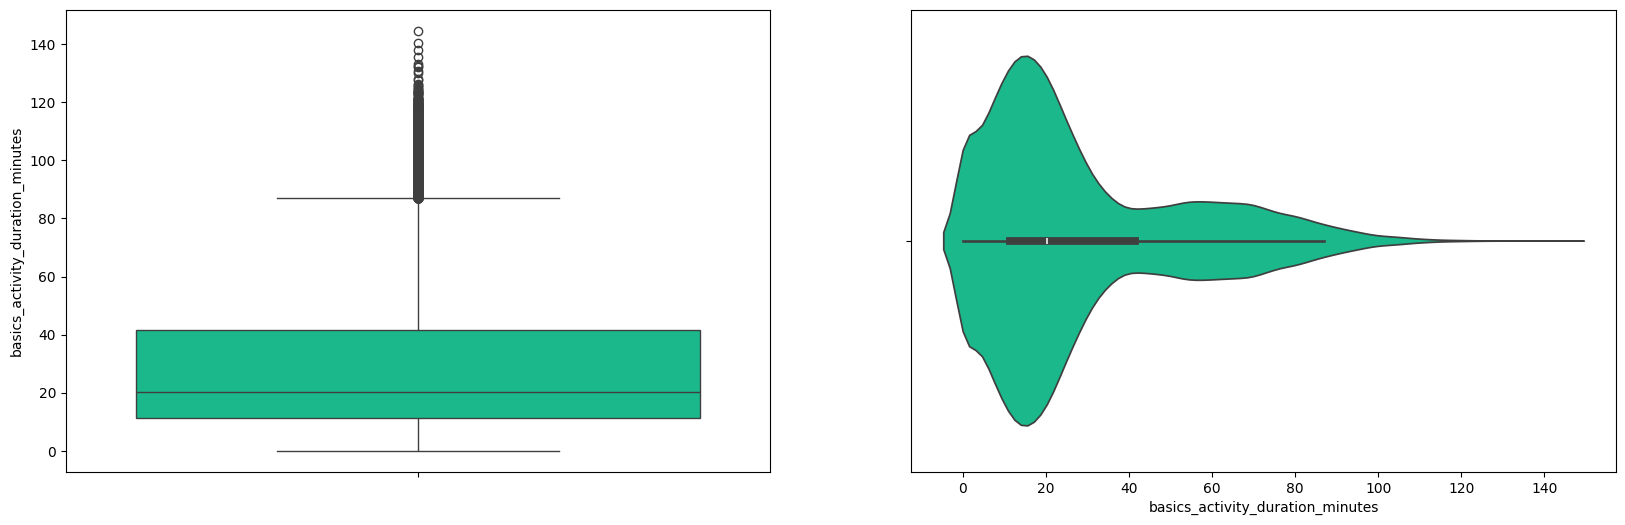

In [56]:
# ploting...
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.boxplot(y = users_subscriptions['basics_activity_duration_minutes'], color='#00D296')

plt.subplot(1, 2, 2)
sns.violinplot(x = users_subscriptions['basics_activity_duration_minutes'], color='#00D296')


plt.show()

# there is some values considered as an outlier, but with values that make sense when we look at them on the dataset context
# for example: it's ok to someone spend 140 minutes to finish the basics. 

# here, I would consider a true outlier if we found something greater than 1 day of duration time

## Check the started_at and end_at infos
To see if there is any subscriptions that starts after the end_at timestamp

In [75]:
# change the datatype of date columns
date_cols = ['subscription_start_at', 'subscription_end_at', 'signup_at']

for col in date_cols:
    users_subscriptions[col] = pd.to_datetime(users_subscriptions[col])


print(users_subscriptions[users_subscriptions['subscription_start_at'] > users_subscriptions['subscription_end_at']])

# there is no subscription with insconsistence on the start and end date

Empty DataFrame
Columns: [user_id, signup_at, country, platform, app_version, basics_completed, basics_activity_duration_minutes, subscription_id, subscription_start_at, subscription_end_at, subscription_type, subscription_price_eur]
Index: []


## Check the subscription type column
To see if there is a typo in this column

In [63]:
users_subscriptions['subscription_type'].unique()

# there is no typo in subscription type column

array([nan, 'Yearly', 'Monthly'], dtype=object)

## Check the platform column
To see if there is a typo in this column

In [65]:
users_subscriptions['platform'].unique()

# there is no typo in platform column

array(['iOS', 'Android', 'Desktop'], dtype=object)

## Check the coutry column
To see if there is a typo or a coutry that don't exists

In [67]:
users_subscriptions['country'].unique()

# there is no typo in country column or a country that doesn't exist

array(['US', 'FI', 'GB', 'CA', 'JP'], dtype=object)

## Check sign_up dates
To check if there is some date that doesn't make sense, or if there is a user with singup_at grater than subscription end_at or started_at

In [83]:
min_vl = users_subscriptions['signup_at'].min().date()
max_vl = users_subscriptions['signup_at'].max().date()

erro_qnt = users_subscriptions[
    (users_subscriptions['signup_at'] > users_subscriptions['subscription_start_at']) |
    (users_subscriptions['signup_at'] > users_subscriptions['subscription_end_at'])
].shape[0]


print(f"The min value of the date is: {min_vl} and the max value is: {max_vl}", '\n',
      f"The number of errors is: {erro_qnt}", end='')


# there is no subscription with messed up signup_at values

The min value of the date is: 2021-12-11 and the max value is: 2022-12-10 
 The number of errors is: 0

## Check the flag "basic_completed"
To check whether there are values other than True or False

In [84]:
users_subscriptions['basics_completed'].unique()

# there are only True or False values

array([False,  True])

## Check null values

In [88]:
users_subscriptions.isna().sum()

# there are null values only in the lines of customers without a subscription or in those who have a subscription but have not yet finished it

user_id                                  0
signup_at                                0
country                                  0
platform                                 0
app_version                              0
basics_completed                         0
basics_activity_duration_minutes         0
subscription_id                     119650
subscription_start_at               119650
subscription_end_at                 121272
subscription_type                   119650
subscription_price_eur              119650
dtype: int64